<a href="https://colab.research.google.com/github/khoji-code/Data-Science-AI-for-Business-Portfolio/blob/main/Large_Scale_Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Large-Scale Social Media Sentiment Analysis

### Project Overview
* Utilizes a **real-world dataset** of 1.6 million tweets from Kaggle to ensure authentic analysis.
* Demonstrates a scalable workflow by analyzing a large, random sample of **1,000 tweets**.
* Employs a state-of-the-art **Large Language Model (LLM)**, specifically `twitter-roberta-base-sentiment-latest`, which is fine-tuned for the nuances of social media language.
* Automates the process of classifying each tweet into **Positive, Negative, or Neutral** sentiment categories.
* The final output is a **Business Intelligence (BI) report** that visualizes the overall sentiment distribution and provides actionable insights.

***

### Purpose of the Project
* To simulate a real-world **brand monitoring** scenario, showcasing how a company can process and understand public opinion at scale.
* To demonstrate the power of specialized LLMs in extracting accurate and nuanced sentiment from large volumes of **unstructured text data**.
* To transform raw social media mentions into **actionable intelligence** that can guide strategic decisions in marketing, product development, and customer service.
* To provide a blueprint for a scalable system that can track brand health and public perception in **near real-time**.

### Dataset:
https://www.kaggle.com/datasets/kazanova/sentiment140

## Install libraries

In [1]:
!pip install transformers torch pandas matplotlib seaborn numpy kaggle -q
print("Libraries installed ")

Libraries installed 


## Import libraries

In [2]:
import torch
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
import os
from google.colab import files
print("Libraries Imported")

Libraries Imported


## KAGGLE API SETUP & DATASET DOWNLOAD

In [3]:
# Download the Twitter Sentiment140 dataset
print("Upload your kaggle.json file")
uploaded = files.upload()

if "kaggle.json" in uploaded:
    print("Kaggle API token uploaded")
    # Set up the Kaggle directory and permissions
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("⚙️ Kaggle API configured")

    # Download the dataset
    print("📥 Downloading the Twitter Sentiment140 dataset...")
    !kaggle datasets download -d kazanova/sentiment140 --unzip -p ./data
    print("Dataset downloaded successfully")
    DATA_LOADED_SUCCESSFULLY = True
else:
    print("Kaggle API token not found")
    DATA_LOADED_SUCCESSFULLY = False

Upload your kaggle.json file


Saving kaggle.json to kaggle.json
Kaggle API token uploaded
⚙️ Kaggle API configured
📥 Downloading the Twitter Sentiment140 dataset...
Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
  0% 0.00/80.9M [00:00<?, ?B/s]
100% 80.9M/80.9M [00:00<00:00, 955MB/s]
Dataset downloaded successfully


## Load the Specialized LLM for Sentiment Analysis

In [4]:
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    device=0 if torch.cuda.is_available() else -1 # Use GPU if available
)
print("LLM loaded successfully.")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


LLM loaded successfully.


## Load and Prepare the Real Tweet Dataset

In [5]:
if DATA_LOADED_SUCCESSFULLY:
    # Preparing the real tweet dataset
    # Define column names as the CSV does not have a header
    col_names = ['target', 'id', 'date', 'flag', 'user', 'text']
    # Load the dataset
    df_tweets = pd.read_csv(
        './data/training.1600000.processed.noemoticon.csv',
        encoding='latin-1',
        names=col_names
    )

    # random sample of 1000 tweets
    sample_size = 1000
    df_sample = df_tweets.sample(n=sample_size, random_state=42)
    tweet_data = df_sample['text'].tolist()
    print(f"Dataset loaded. Analyzing a sample of {len(tweet_data)} real tweets.")
else:
    tweet_data = [] # Ensure the list exists to prevent errors

Dataset loaded. Analyzing a sample of 1000 real tweets.


## Analyze Sentiment of All Tweets with the LLM - BI Dashboard & Report

LLM is analyzing the sentiment of 1000 real tweets...
Processed 100/1000 tweets...
Processed 200/1000 tweets...
Processed 300/1000 tweets...
Processed 400/1000 tweets...
Processed 500/1000 tweets...
Processed 600/1000 tweets...
Processed 700/1000 tweets...
Processed 800/1000 tweets...
Processed 900/1000 tweets...
Processed 1000/1000 tweets...
Analysis complete.
Project Aether: Large-Scale Sentiment Intelligence Report

 Overall Sentiment Distribution (1000 Tweets)
sentiment
Positive    39.6
Negative    34.0
Neutral     26.4


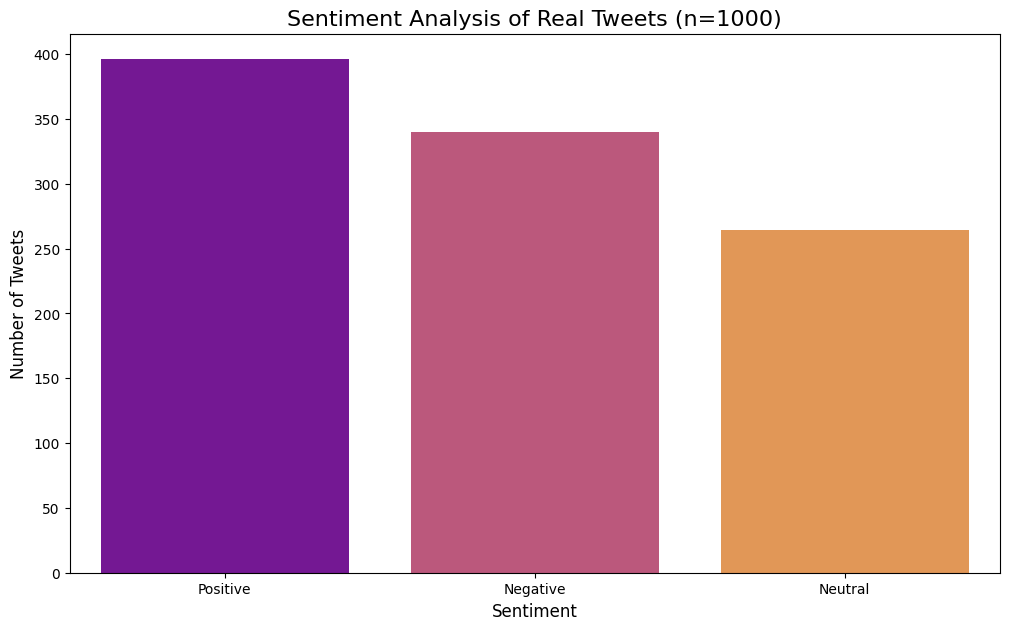

In [8]:
if tweet_data:
    print(f"LLM is analyzing the sentiment of {len(tweet_data)} real tweets...")
    results = []
    # Process tweets in batches for better performance
    for i, out in enumerate(sentiment_analyzer(tweet_data, batch_size=32, truncation=True)):
        results.append({
            'tweet': tweet_data[i],
            'sentiment': out['label'].capitalize(),
            'confidence': out['score']
        })
        # Print progress
        if (i + 1) % 100 == 0:
            print(f"Processed {i + 1}/{len(tweet_data)} tweets...")

    print("Analysis complete.")
    df_results = pd.DataFrame(results)

    # Generate Business Intelligence Dashboard & Report
    print("Project Aether: Large-Scale Sentiment Intelligence Report")

    sentiment_counts = df_results['sentiment'].value_counts()
    total_tweets = len(df_results)
    sentiment_percentage = (sentiment_counts / total_tweets) * 100

    print(f"\n Overall Sentiment Distribution ({len(tweet_data)} Tweets)")
    print(sentiment_percentage.round(2).to_string())

    # Visualize the sentiment distribution
    plt.figure(figsize=(12, 7))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="plasma",hue=sentiment_counts.index)
    plt.title(f"Sentiment Analysis of Real Tweets (n={len(tweet_data)})", fontsize=16)
    plt.xlabel("Sentiment", fontsize=12)
    plt.ylabel("Number of Tweets", fontsize=12)
    plt.show()

else:
    print("\nSkipping analysis as the dataset could not be loaded!!!")